In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

# Exercise 9

Use again the wage1 data

1. Regress $wage$ on $education$ and $education^2$. Compute the parameters and interpret the parameters. Compute the 95% confidence intervals.Compute the t-statistics. Check if you have done it correctly by comparing with the output table you get when using `summary`. Are the effects significant at the 5% level? And at the 1% level? 
1. How large is the share of persons in the dataset with less than 5 years of education? How many have more than 20 years of education? 
1. Plot the quadratic effect of education on wage.
1. What is the turning point of the quadratic effect of education on years?
1. What could be a reason why the effects is fallin in the beginning?
1. Add log(exper), female and nonwhite to the regression model and estimate it.
1. Calculate the 0.05, 0.1, 0.5, 0.9 and 0.95 quantiles for education.
1. Predict the quadratic effect of $education$ on $wage$ for values larger than the 10% and smaller than the 90% quantile values of education. Hold the other variables fixed at their mean for the prediction. Report the predictions in a table.
1. Visualize the non-linear effect in a plot and add the 95% confidence interval to it.



In [180]:
df = woo.dataWoo('wage1')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [181]:
df.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


**1.** Regress wage on education and education^2. Compute the parameters and interpret the parameters. Compute the 95% confidence intervals. Compute the t-statistics. Check if you have done it correctly by comparing with the output table you get when using `summary`. Are the effects significants at the 5% level? And at the 1% level?

In [182]:
# Regression and parameters

reg = smf.ols(formula='wage ~ educ + I(educ ** 2)', data=df)
results = reg.fit()
b0, b1, b2 = results.params
se = results.bse
print(f"b0 = {b0}\nb1 = {b1} \nb2 = {b2}")
print(f"Turning point : {-b1/(2*b2)}")

b0 = 5.407687810016611
b1 = -0.607499899070353 
b2 = 0.04907244430062186
Turning point : 6.189827180288374


The wage one can hope whithout education is 5\$/h ($\beta_0$).

Because $\beta_2 > 0$, we've got here a U-shape, whith a turning point at $6$, but we have only few data about people with a level of education inferior to 5. We sould consider the positive part of the curve and conclude that education have a positive, quadratic effect on wage.

In [183]:
# Confidence intervall

b = [b0, b1, b2]
alpha = np.array([0.025, 0.005])
cv_t = cv_t = stats.t.ppf(1 - alpha, 524) # 523 = len(df) - nb of variable - 1 = 526 - 2 - 1

# 0.05
lower_CI_5 = b - cv_t[0] * se
upper_CI_5 = b + cv_t[0] * se

# 0.01
lower_CI_1 = b - cv_t[1] * se
upper_CI_1 = b + cv_t[1] * se

table = pd.DataFrame({
    'lower CI 0.01': lower_CI_1,
    'lower CI 0.05': lower_CI_5,
    'param': b,
    'upper CI 5': upper_CI_5,
    'upper_CI_1': upper_CI_1
})

table.head()

,lower CI 0.01,lower CI 0.05,param,upper CI 5,upper_CI_1
Intercept,1.636171,2.541749,5.407688,8.273626,9.179205
educ,-1.231811,-1.081908,-0.607500,-0.133092,0.016812
I(educ ** 2),0.023034,0.029286,0.049072,0.068859,0.075111


In [184]:
# t-statistic

t_stat = b/se

print(f"t-stat = \n{t_stat}")

t-stat = 
Intercept       3.706783
educ           -2.515628
I(educ ** 2)    4.872241
dtype: float64


In [185]:
# significant ?

print(f"educ : {b1 > 2 * t_stat[1]}")
print(f"educ**2 : {b2 > 2 * t_stat[2]}")

educ : True
educ**2 : False


**2.** How large is the share of persons in the dataset with less than 5 years of education? How many have more than 20 years of education?

In [186]:
print(f"Share of persons with less than 5 years of education : {len(df[df.educ < 5])/len(df) * 100}%")
print(f"Share of persons with more than 20 years of education : {len(df[df.educ > 20])/len(df) * 100}%")

Share of persons with less than 5 years of education : 1.3307984790874523%
Share of persons with more than 20 years of education : 0.0%


**3.** Plot the quadratic effect of education on wage.

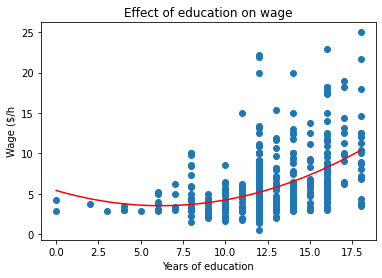

In [187]:
plt.scatter(df['educ'], df['wage'])
educ_axis = np.linspace(df['educ'].min(), df['educ'].max(), 100)
plt.plot(educ_axis, b0 + b1 * educ_axis + b2 * educ_axis**2, color='red')
plt.title('Effect of education on wage')
plt.xlabel('Years of education')
plt.ylabel('Wage ($/h')
plt.show()

**4.** What is the turning point of the quadratic effect of education on years?

In [188]:
print(f"The turning point is : {-b1/(2 * b2)}")

The turning point is : 6.189827180288374


**5.** What could be a reason why the effects is fallin in the beginning?

A very small share (3%) of the data concerns people with a level of education under the turning point. The model is quite not adjusted in this region. We would rather not consider this fallin in the beginning.

**6.** Add log(exper), female and nonwhite to the regression model and estimate it.

In [189]:
reg = smf.ols(formula='wage ~ educ + I(educ ** 2) + np.log(exper) + female + nonwhite', data=df)
results = reg.fit()
b = results.params
se = results.bse
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     58.00
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           6.23e-48
Time:                        14:03:25   Log-Likelihood:                -1316.5
No. Observations:                 526   AIC:                             2645.
Df Residuals:                     520   BIC:                             2671.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7436      1.415      1.233      0.218      -1.035       4.523
educ             -0.2456      0.220     -1.116      0.265      -0.678       0.187
I(educ ** 2)      0.0355      0.009      3.877      0.000       0.018       0.054
np.log(exper)     0.9791      0.125      7.832      0.000       0.734       1.225
female           -2.0006      0.263     -7.602      0.000      -2.518      -1.484
nonwhite         -0.2589      0.429     -0.603      0.547      -1.103       0.585
==============================================================================
Omnibus:                      193.098   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.574
Skew:                           1.639   Prob(JB):                    8.61e-170
Kurtosis:                       7.978   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**7.** Calculate the 0.05, 0.1, 0.5, 0.9 and 0.95 quantiles for education.

In [190]:
alpha = np.array([0.05, 0.1, 0.5, 0.9, 0.95])/2
cv_t = stats.t.ppf(1 - alpha, 526 - 5 - 1)

for i in range(len(alpha)):
    print(f"Quantile for {alpha[i]*2}: {b[0] + cv_t[i] * se[i]}")

Quantile for 0.05: 4.52262215163562
Quantile for 0.1: 2.1063682532177634
Quantile for 0.5: 1.7497790557796742
Quantile for 0.9: 1.7593122739080869
Quantile for 0.95: 1.7601059509273824


???

**8.** Predict the quadratic effect of education on wage for values larger than the 10% and smaller than the 90% quantile values of education. Hold the other variables fixed at their mean for the prediction. Report the predictions in a table.

In [191]:
# Creating new data

df_ = df[(df.educ > df.educ.quantile(0.1)) & (df.educ < df.educ.quantile(0.9))]
for column in df_.columns:
    if column != 'educ' and column != 'wage':
        df_[column] = df_[column].mean()

# Regression

reg = smf.ols(formula='wage ~ educ + I(educ ** 2)', data=df_)
results = reg.fit()
b = results.params
se = results.bse
print(results.summary())


# Predictions


#wage_hat = results.fittedvalues
#u_hat = results.resid

wage_hat = b[0] + b[1] * df_['educ'] + b[2] * df_['educ']**2
residuals = df['wage'] - wage_hat

table = pd.DataFrame({'educ': df_['educ'],
                      'wage': df_['wage'],
                      'wage_hat': wage_hat,
                      'u_hat': residuals})
table.head()

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.940
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           0.000162
Time:                        14:03:25   Log-Likelihood:                -932.49
No. Observations:                 370   AIC:                             1871.
Df Residuals:                     367   BIC:                             1883.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.7272     11.951     -1.232   

/var/folders/2x/jyk25dss11q4zcwpyjj6vtx40000gn/T/ipykernel_1116/3209753589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[column] = df_[column].mean()


,educ,wage,wage_hat,u_hat
0,11.0,3.10,4.594483,-1.494483
1,12.0,3.24,5.297121,-2.057121
2,11.0,3.00,4.594483,-1.594483
3,NaN,NaN,NaN,NaN
4,12.0,5.30,5.297121,0.002879


**9.** Visualize the non-linear effect in a plot and add the 95% confidence interval to it.

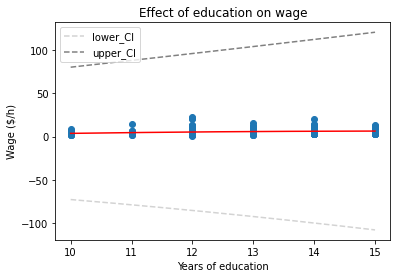

In [192]:
# 95% confidence intervall
cv_t = stats.t.ppf(0.975, len(df_) - 3)
lower_CI = b - cv_t * se
upper_CI = b + cv_t * se

# Plot data
plt.scatter(df_['educ'], df_['wage'])

# Plot regression line
educ_axis = np.linspace(df_['educ'].min(), df_['educ'].max(), len(df_))
plt.plot(educ_axis, b[0]+ b[1] * educ_axis + b[2] * educ_axis**2, color='red')

# Plot confidence intervall
plt.plot(educ_axis, lower_CI[0] + lower_CI[1] * educ_axis + lower_CI[2] * educ_axis ** 2, color='lightgrey', linestyle='--', label='lower_CI')
plt.plot(educ_axis, upper_CI[0] + upper_CI[1] * educ_axis + upper_CI[2] * educ_axis ** 2, color='grey', linestyle='--', label='upper_CI')

# Title etc
plt.title('Effect of education on wage')
plt.xlabel('Years of education')
plt.ylabel('Wage ($/h)')
plt.legend()
plt.show()

It seems the confindence intervalls are very large.

# Exercise 10

Let's analyze the following example: We are interested in studying the relationship between doctor visits (mdvis) and both log income and the binary variable health status (hlthp) which is coded as 1 for a bad health condition and zero for a good health condition (or at least not bad).

Use the dataset 'randhie' which is accessible here:

https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv

You can either download it on your computer and load from there or you can directly load it into Python from the website. As you see from the ending of the url it is a .csv file.

1. Regress doctor visits on log(income) and health status and report the results. Visualize the difference in the effect of log(income) on docvisits depending on the health status. 
1. Add an interaction term of health status and log(income) to the regression model. Re-estimate the model and interpret the coefficient.
1. Visualize how the slope of the effect of log(income) varies between men and women .


In [193]:
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')
df.head()

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
0,3,1,100,0,1,125024,1.0,13748.76,42.87748,0,...,0.0,0.0,1,0,0,65.2078,9.528776,1.386294,2.134299,1
1,3,1,100,0,2,125024,1.0,13748.76,43.87748,0,...,0.0,0.0,1,0,0,65.2078,9.528776,1.386294,4.128351,1
2,3,1,100,0,3,125024,1.0,13748.76,44.87748,0,...,0.0,0.0,1,0,0,65.2078,9.528776,1.386294,NaN,0
3,3,1,100,0,4,125024,1.0,13748.76,45.87748,0,...,0.0,0.0,1,0,0,65.2078,9.528776,1.386294,NaN,0
4,3,1,100,0,5,125024,1.0,13748.76,46.87748,0,...,0.0,0.0,1,0,0,65.2078,9.528776,1.386294,NaN,0


In [194]:
df.describe()

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
count,20190.000000,20190.000000,20190.000000,20190.000000,20190.000000,20190.00000,20190.000000,20190.000000,20190.000000,20190.000000,...,20190.000000,20190.000000,20190.000000,20190.000000,20190.000000,20190.000000,20190.000000,20190.000000,15737.000000,20190.000000
mean,11.175532,3.298811,26.305597,0.597424,2.420109,357965.47999,0.181498,8037.409244,25.722328,0.517038,...,2.383341,4.029524,0.362011,0.077266,0.014958,73.237497,8.708265,1.248156,4.109318,0.779445
std,3.976751,1.803820,36.403856,0.490429,1.217141,180868.13835,0.382707,4058.371448,16.769454,0.499722,...,2.041775,3.471353,0.480594,0.267020,0.121387,14.233198,1.228309,0.539301,1.484654,0.414631
min,1.000000,1.000000,0.000000,0.000000,1.000000,125024.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,0.000000,0.000000,-0.849533,0.000000
25%,10.000000,2.000000,0.000000,0.000000,1.000000,225586.00000,0.000000,5334.311000,11.463723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.900000,8.582103,1.098612,3.127211,1.000000
50%,11.000000,3.000000,0.000000,1.000000,2.000000,328374.00000,0.000000,7975.953000,24.200205,1.000000,...,3.258096,6.093520,0.000000,0.000000,0.000000,74.100000,8.984312,1.386294,4.019879,1.000000
75%,13.000000,5.000000,50.000000,1.000000,3.000000,526425.00000,0.000000,10474.570000,37.422145,1.000000,...,4.564348,6.959049,1.000000,0.000000,0.000000,81.800000,9.256801,1.609438,4.952186,1.000000
max,19.000000,6.000000,100.000000,1.000000,5.000000,632167.00000,1.000000,29237.540000,64.275150,1.000000,...,4.564348,8.294049,1.000000,1.000000,1.000000,100.000000,10.283240,2.639057,10.575970,1.000000


**1.** Regress doctor visits on log(income) and health status and report the results. Visualize the difference in the effect of log(income) on docvisitis depending on the health status.

In [195]:
# Both health status
reg = smf.ols(formula='mdvis ~ linc + hlthp', data=df)
results = reg.fit()
b = results.params
print(results.summary())

# Bad health condition
reg_b = smf.ols(formula='mdvis ~ linc', data=df[df.hlthf == 1])
results_b = reg_b.fit()
b_b = results_b.params

# Good health condition
reg_g = smf.ols(formula='mdvis ~ linc ', data=df[df.hlthf == 0])
results_g = reg_g.fit()
b_g = results_g.params


                            OLS Regression Results                            
Dep. Variable:                  mdvis   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     129.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           9.36e-57
Time:                        14:03:26   Log-Likelihood:                -58906.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20187   BIC:                         1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2725      0.227      1.200      0.2

**2.** Add an interaction term of health status and log(income) to the regression model. Re-estimate the model and interpret the coefficient.

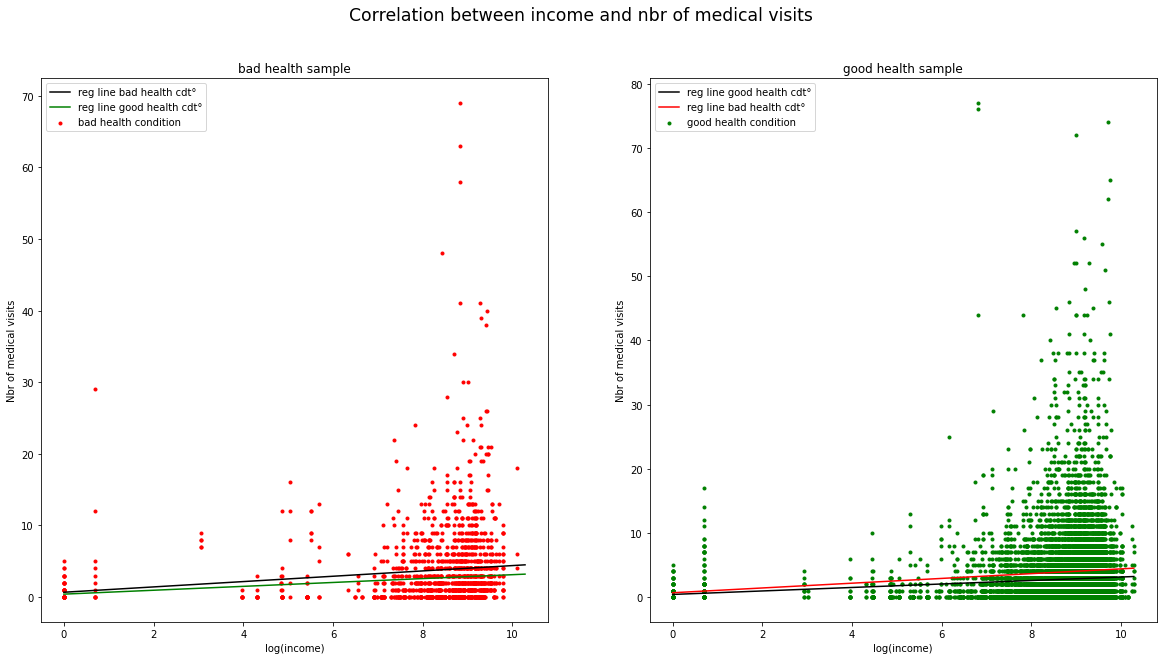

In [196]:
linc_axis = np.linspace(df.linc.min(), df.linc.max(), 100)

fig, axis = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Correlation between income and nbr of medical visits', fontsize='xx-large')

axis[0].scatter(df['linc'][df.hlthf == 1], df['mdvis'][df.hlthf == 1], color='red', label='bad health condition', marker='.')
axis[0].plot(linc_axis, b_b[0] + b_b[1] * linc_axis, color='black', label='reg line bad health cdt°')
axis[0].plot(linc_axis, b_g[0] + b_g[1] * linc_axis, color='green',  label='reg line good health cdt°')
axis[0].legend()
axis[0].set_title('bad health sample')
axis[0].set_xlabel('log(income)')
axis[0].set_ylabel('Nbr of medical visits')

axis[1].scatter(df['linc'][df.hlthf == 0], df['mdvis'][df.hlthf == 0], color='green', label='good health condition', marker='.')
axis[1].plot(linc_axis, b_g[0] + b_g[1] * linc_axis, color='black', label='reg line good health cdt°')
axis[1].plot(linc_axis, b_b[0] + b_b[1] * linc_axis, color='red', label='reg line bad health cdt°')
axis[1].legend()
axis[1].set_title('good health sample')
axis[1].set_xlabel('log(income)')
axis[1].set_ylabel('Nbr of medical visits')


plt.show()

**2.** Add an interaction term of health status and log(income) to the regression model. Re-estimate the model and interpret the coefficient.

In [197]:
# Both health status
reg = smf.ols(formula='mdvis ~ linc + hlthp + linc * hlthp', data=df)
results = reg.fit()
b = results.params
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  mdvis   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     93.21
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           6.57e-60
Time:                        14:03:27   Log-Likelihood:                -58896.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20186   BIC:                         1.178e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5217      0.234      2.231      0.0

????

**3.** Visualize how the slope of the effect of log(income) varies between men and women.

In [198]:
# Both gender
reg = smf.ols(formula='mdvis ~ linc', data=df)
results = reg.fit()
b = results.params
print(results.summary())

# Female
reg_f = smf.ols(formula='mdvis ~ linc', data=df[df.female == 1])
results_f = reg_f.fit()
b_f = results_f.params

# Male
reg_m = smf.ols(formula='mdvis ~ linc ', data=df[df.female == 0])
results_m = reg_m.fit()
b_m = results_m.params


                            OLS Regression Results                            
Dep. Variable:                  mdvis   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.05e-23
Time:                        14:03:27   Log-Likelihood:                -58984.
No. Observations:               20190   AIC:                         1.180e+05
Df Residuals:                   20188   BIC:                         1.180e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6074      0.226      2.683      0.0

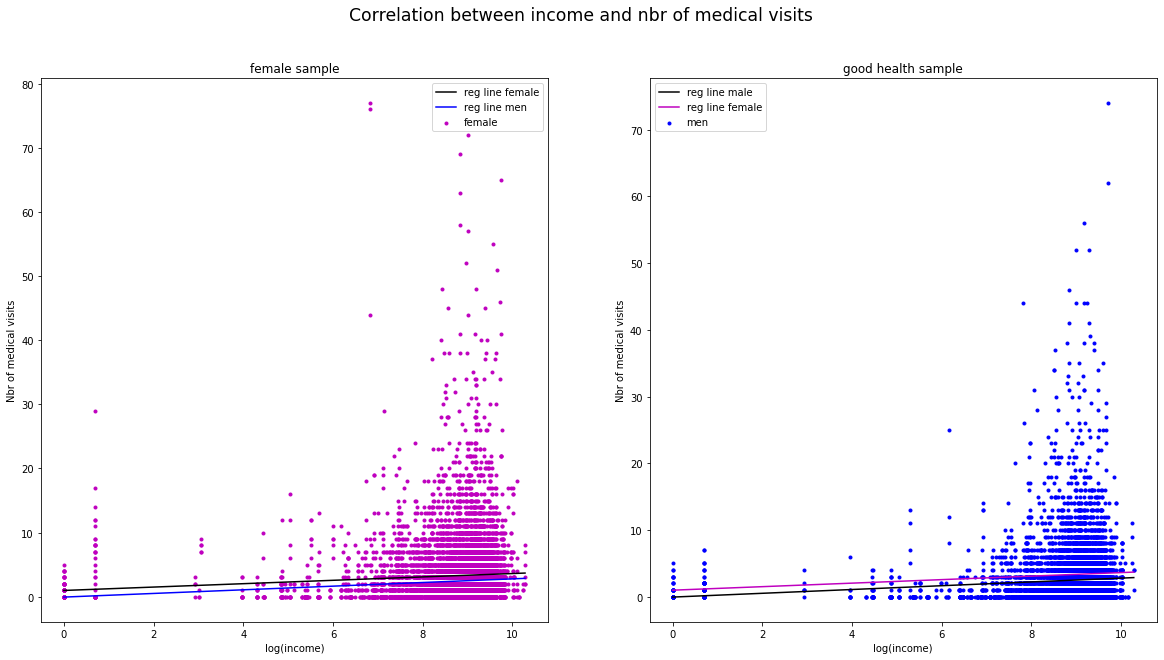

In [199]:
linc_axis = np.linspace(df.linc.min(), df.linc.max(), 100)

fig, axis = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Correlation between income and nbr of medical visits', fontsize='xx-large')

axis[0].scatter(df['linc'][df.female == 1], df['mdvis'][df.female == 1], color='m', label='female', marker='.')
axis[0].plot(linc_axis, b_f[0] + b_f[1] * linc_axis, color='black', label='reg line female')
axis[0].plot(linc_axis, b_m[0] + b_m[1] * linc_axis, color='blue',  label='reg line men')
axis[0].legend()
axis[0].set_title('female sample')
axis[0].set_xlabel('log(income)')
axis[0].set_ylabel('Nbr of medical visits')

axis[1].scatter(df['linc'][df.female == 0], df['mdvis'][df.female == 0], color='blue', label='men', marker='.')
axis[1].plot(linc_axis, b_m[0] + b_m[1] * linc_axis, color='black', label='reg line male')
axis[1].plot(linc_axis, b_f[0] + b_f[1] * linc_axis, color='m', label='reg line female')
axis[1].legend()
axis[1].set_title('good health sample')
axis[1].set_xlabel('log(income)')
axis[1].set_ylabel('Nbr of medical visits')


plt.show()